## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [66]:
import os
import keras
import itertools
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l1
import matplotlib.pyplot as plt
%matplotlib inline
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [67]:
train, test = keras.datasets.cifar10.load_data()

In [68]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [69]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [70]:

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128], l1_ratio=1e-4, drop_ratio = 0.3):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units = n_units,
                                   activation = 'relu',
                                   name = 'hidden_layer'+str(i+1),
                                   kernel_regularizer = l1(l1_ratio))(x)
            x = Dropout(drop_ratio)(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units = n_units, 
                                   activation = 'relu',
                                   name = 'hidden_layer'+str(i+1), 
                                   kernel_regularizer = l1(l1_ratio))(x)
            x = Dropout(drop_ratio)(x)
    output_layer = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [71]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [72]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print('Experiment with Regulizer:{:.13f}'.format(regulizer_ratio))
    model = build_mlp(input_shape = x_train.shape[1:], l1_ratio = regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    
    model.fit(x_train, y_train, batch_size = BATCH_SIZE, 
              epochs = EPOCHS, validation_data = (x_test, y_test), 
              shuffle = True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    

Experiment with Regulizer:0.0100000000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropou

Epoch 43/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.4067 - accuracy: 0.2723 - val_loss: 2.3407 - val_accuracy: 0.3162
Epoch 44/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.4146 - accuracy: 0.2702 - val_loss: 2.3576 - val_accuracy: 0.3086
Epoch 45/50
50000/50000 [==============================] - 11s 216us/step - loss: 2.4093 - accuracy: 0.2705 - val_loss: 2.3458 - val_accuracy: 0.3314
Epoch 46/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.4090 - accuracy: 0.2673 - val_loss: 2.3749 - val_accuracy: 0.3049
Epoch 47/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.4014 - accuracy: 0.2734 - val_loss: 2.3635 - val_accuracy: 0.3078
Epoch 48/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.4038 - accuracy: 0.2691 - val_loss: 2.3863 - val_accuracy: 0.3046
Epoch 49/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.4026 - accuracy:

Epoch 35/50
50000/50000 [==============================] - 9s 173us/step - loss: 4.9467 - accuracy: 0.4619 - val_loss: 4.8426 - val_accuracy: 0.4899
Epoch 36/50
50000/50000 [==============================] - 11s 210us/step - loss: 4.9280 - accuracy: 0.4611 - val_loss: 4.8221 - val_accuracy: 0.4932
Epoch 37/50
50000/50000 [==============================] - 11s 213us/step - loss: 4.9065 - accuracy: 0.4642 - val_loss: 4.8041 - val_accuracy: 0.4934
Epoch 38/50
50000/50000 [==============================] - 10s 209us/step - loss: 4.8832 - accuracy: 0.4634 - val_loss: 4.7841 - val_accuracy: 0.4942
Epoch 39/50
50000/50000 [==============================] - 10s 202us/step - loss: 4.8629 - accuracy: 0.4665 - val_loss: 4.7654 - val_accuracy: 0.4937
Epoch 40/50
50000/50000 [==============================] - 10s 199us/step - loss: 4.8446 - accuracy: 0.4690 - val_loss: 4.7464 - val_accuracy: 0.4969
Epoch 41/50
50000/50000 [==============================] - 10s 192us/step - loss: 4.8197 - accuracy: 

Epoch 27/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.5787 - accuracy: 0.4343 - val_loss: 1.4611 - val_accuracy: 0.4779
Epoch 28/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5733 - accuracy: 0.4364 - val_loss: 1.4557 - val_accuracy: 0.4804
Epoch 29/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5667 - accuracy: 0.4370 - val_loss: 1.4510 - val_accuracy: 0.4810
Epoch 30/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.5585 - accuracy: 0.4400 - val_loss: 1.4448 - val_accuracy: 0.4824
Epoch 31/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.5474 - accuracy: 0.4438 - val_loss: 1.4401 - val_accuracy: 0.4832
Epoch 32/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5436 - accuracy: 0.4465 - val_loss: 1.4378 - val_accuracy: 0.4835
Epoch 33/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5422 - accuracy:

50000/50000 [==============================] - 10s 199us/step - loss: 1.6584 - accuracy: 0.4057 - val_loss: 1.4987 - val_accuracy: 0.4648
Epoch 19/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6508 - accuracy: 0.4095 - val_loss: 1.4920 - val_accuracy: 0.4680
Epoch 20/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.6376 - accuracy: 0.4106 - val_loss: 1.4850 - val_accuracy: 0.4717
Epoch 21/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6332 - accuracy: 0.4128 - val_loss: 1.4812 - val_accuracy: 0.4697
Epoch 22/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.6204 - accuracy: 0.4155 - val_loss: 1.4732 - val_accuracy: 0.4751
Epoch 23/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6129 - accuracy: 0.4215 - val_loss: 1.4683 - val_accuracy: 0.4761
Epoch 24/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.6018 - accuracy: 0.4257 - val

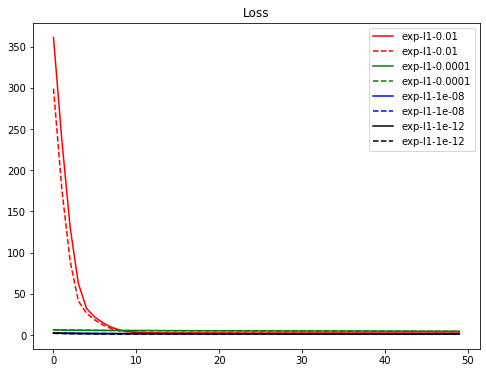

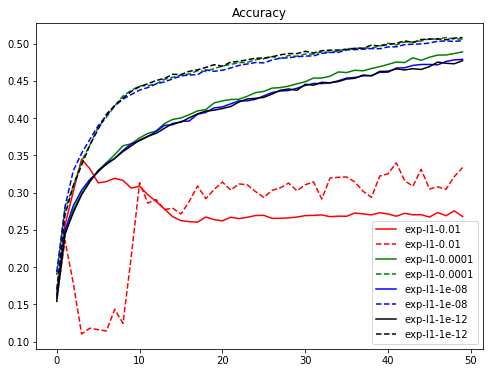

In [73]:
color_bar = ['r', 'g', 'b', 'k', 'y', 'm']

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()